In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./data/Kyphosis.csv')
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [4]:
y = df['Kyphosis']
x= df.drop('Kyphosis', axis=1)

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=111)

In [6]:
from sklearn.tree import DecisionTreeClassifier

In [7]:
dt = DecisionTreeClassifier()

In [8]:
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [12]:
preds = dt.predict(x_test)

In [13]:
preds

array(['absent', 'absent', 'absent', 'present', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'present', 'absent',
       'absent', 'present', 'absent', 'absent', 'absent'], dtype=object)

In [14]:
from sklearn.metrics import confusion_matrix, classification_report

In [15]:
confusion_matrix(y_test, preds)

array([[14,  2],
       [ 0,  1]], dtype=int64)

In [16]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

      absent       1.00      0.88      0.93        16
     present       0.33      1.00      0.50         1

    accuracy                           0.88        17
   macro avg       0.67      0.94      0.72        17
weighted avg       0.96      0.88      0.91        17



In [25]:
# feature_importance
# 어떤 칼럼이 중요한지 주요도를 나타냄...

In [26]:
df.columns[1:]

Index(['Age', 'Number', 'Start'], dtype='object')

In [27]:
dt.feature_importances_

array([0.45495338, 0.06666667, 0.47837995])

In [28]:
# tree를 그린다..

In [29]:
from sklearn.tree import plot_tree

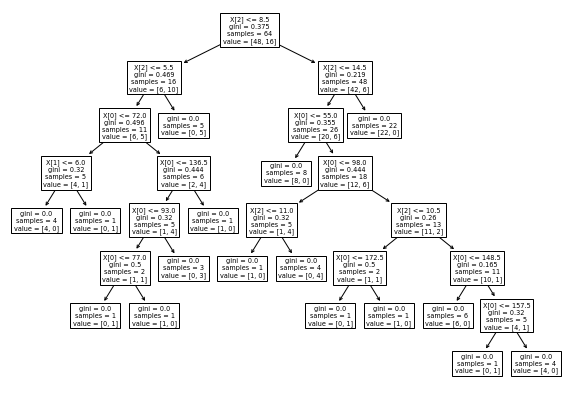

In [30]:
plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

In [31]:
# ensemble : 모델 여러개를 학습시켜서 여러 모델에서 나온 결과를 종합해서 최종 결정을 내리는 모델..

In [32]:
# randomforest : 모델 여러개를 학습시켜서 여러 모델에서 나온 결과를 종합해서 최종 결정을 내린다.

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
rfc = RandomForestClassifier(n_estimators = 100)

In [35]:
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [25]:
rfc_preds = rfc.predict(x_test)

In [26]:
print(classification_report(y_test, rfc_preds))

              precision    recall  f1-score   support

      absent       1.00      0.94      0.97        16
     present       0.50      1.00      0.67         1

    accuracy                           0.94        17
   macro avg       0.75      0.97      0.82        17
weighted avg       0.97      0.94      0.95        17

